<a href="https://colab.research.google.com/github/omkar-rayala/Rossmann-Stores-Sales-Prediction/blob/main/retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
  import pandas as pd
  import numpy as np
  import seaborn as sns
  import matplotlib.pyplot as plt
  from numpy import math


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Retail Sales Prediction/merge_df.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,29,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,28,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,27,31


In [ ]:
df = df.drop(columns= ['Date','Promo2SinceWeek','Promo2SinceYear','PromoInterval'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  int64  
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  693861 non-null   float64
 12  CompetitionOpenSinceYear   693861 non-null   float64
 13  Promo2      

In [ ]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
dtype: int64

In [ ]:
df = df.fillna(-1)

In [ ]:
df.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
dtype: int64

In [ ]:
df['StateHoliday'] = df['StateHoliday'].astype('category').cat.codes
df['StoreType'] = df['StoreType'].astype('category').cat.codes
df['Assortment'] = df['Assortment'].astype('category').cat.codes
df['SchoolHoliday'] = df['SchoolHoliday'].astype('category').cat.codes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  int8   
 7   SchoolHoliday              1017209 non-null  int8   
 8   StoreType                  1017209 non-null  int8   
 9   Assortment                 1017209 non-null  int8   
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 13  Promo2      

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


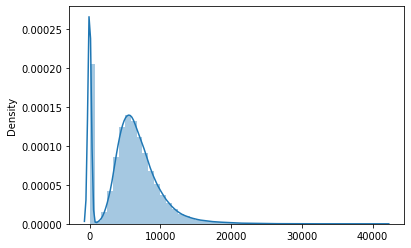

In [ ]:
sns.distplot(x = df['Sales'])

In [ ]:
### Remove rows where store is open, but no sales.
df = df.loc[~((df['Open'] == 1) & (df['Sales'] == 0))]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017155 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017155 non-null  int64  
 1   DayOfWeek                  1017155 non-null  int64  
 2   Sales                      1017155 non-null  int64  
 3   Customers                  1017155 non-null  int64  
 4   Open                       1017155 non-null  int64  
 5   Promo                      1017155 non-null  int64  
 6   StateHoliday               1017155 non-null  int8   
 7   SchoolHoliday              1017155 non-null  int8   
 8   StoreType                  1017155 non-null  int8   
 9   Assortment                 1017155 non-null  int8   
 10  CompetitionDistance        1017155 non-null  float64
 11  CompetitionOpenSinceMonth  1017155 non-null  float64
 12  CompetitionOpenSinceYear   1017155 non-null  float64
 13  Promo2      

In [ ]:
dependent_feature = "Sales"
independent_feature = list(set(df.columns.tolist()) - {dependent_feature})

In [ ]:
independent_feature

['Year',
 'Customers',
 'Day',
 'Open',
 'Assortment',
 'Promo',
 'CompetitionDistance',
 'StoreType',
 'CompetitionOpenSinceYear',
 'Month',
 'DayOfWeek',
 'Store',
 'StateHoliday',
 'SchoolHoliday',
 'WeekOfYear',
 'CompetitionOpenSinceMonth',
 'Promo2']

In [ ]:
X = df[independent_feature].values
y = df[dependent_feature].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression


(915439, 17)

In [ ]:
linmodel = LinearRegression()
linmodel.fit(X_train,y_train)

LinearRegression()

In [ ]:
linmodel.intercept_

-291029.30154018704

In [ ]:
linmodel.coef_

array([ 1.44322564e+02,  6.31330749e+00,  1.17748282e+00,  1.31609673e+03,
        1.73464494e+02,  1.25086637e+03,  2.41474728e-02,  2.25120112e+02,
        8.83044820e-02,  4.12792544e+01, -7.49924315e+01, -1.29416222e-01,
       -7.63098577e+02,  4.14717747e+01, -1.63061603e+00, -5.56635356e+00,
        2.03004555e+02])

In [ ]:
y_pred_train = linmodel.predict(X_train)

In [ ]:
y_train

array([3520, 7701, 4464, ..., 8173, 8058, 5241])

In [ ]:
y_pred = linmodel.predict(X_test)

In [ ]:
y_pred

array([7499.89451212, 5897.00882591,  558.37922292, ..., 5356.51758938,
       8752.97694337, 4328.86110159])

In [ ]:
y_test

array([8208, 5559,    0, ..., 6705, 8658, 3612])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
#train performance
rmse = np.sqrt(mean_squared_error(y_train,y_pred_train))
print(rmse)

1398.8573101021461


In [ ]:
#test performance
math.sqrt(mean_squared_error(y_test,y_pred))

1397.3951441419747

In [ ]:
r2_score(y_train, y_pred_train)

0.8679977021205301

In [ ]:
r2_score(y_test,y_pred)

0.8680001684373755

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)

In [ ]:
dtreereg = DecisionTreeRegressor()

In [ ]:
dtreereg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred_train = dtreereg.predict(X_train)

In [ ]:
y_pred_train

array([ 8366.,     0.,  5680., ...,  6636.,  5639., 11692.])

In [ ]:
y_train

array([ 8366,     0,  5680, ...,  6636,  5639, 11692])

In [ ]:
y_pred = dtreereg.predict(X_test)

In [ ]:
y_pred

array([ 5435.,  4616., 10468., ...,  4052.,   984.,  3139.])

In [ ]:
y_test

array([ 5178,  5212, 10886, ...,  3668,  1501,  3044])

In [ ]:
r2_score(y_test,y_pred)

0.9735165051807244

In [ ]:
r2_score(y_pred_train,y_train)

1.0

In [ ]:
math.sqrt(mean_squared_error(y_test,y_pred))

626.3420495624264

In [ ]:
print(math.sqrt(mean_squared_error(y_train,y_pred_train))) #train performance
print(math.sqrt(mean_squared_error(y_test,y_pred))) #test performance
print(r2_score(y_pred_train,y_train)) #rain performance
print(r2_score(y_test,y_pred)) #test performance

0.0
626.3420495624264
1.0
0.9735165051807244


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)


RandomForestRegressor()

In [ ]:
y_pred_train = rf.predict(X_train)

In [ ]:
y_pred_train

array([3584.31, 7803.08, 4411.48, ..., 8309.67, 8043.98, 5231.87])

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([8458.34, 5013.02,    0.  , ..., 6843.2 , 8736.83, 3366.44])

In [ ]:
y_test

array([8208, 5559,    0, ..., 6705, 8658, 3612])

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train,y_pred_train))
print(rmse)

161.75840383928016


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

430.9902850195216


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [ ]:
%%time
xgb.fit(X_train,y_train)

CPU times: user 2min 4s, sys: 507 ms, total: 2min 4s
Wall time: 1min 3s


XGBRegressor(n_jobs=-1, objective='reg:squarederror', random_state=42)

In [ ]:
y_pred_train = xgb.predict(X_train)

In [ ]:
y_pred_train

array([4178.9966, 6681.1997, 4845.2837, ..., 8647.139 , 9256.211 ,
       5076.797 ], dtype=float32)

In [ ]:
y_train

array([3520, 7701, 4464, ..., 8173, 8058, 5241])

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
y_pred

array([8120.192  , 4934.298  ,  306.89124, ..., 5353.8013 , 9322.784  ,
       4051.509  ], dtype=float32)

In [ ]:
y_test

array([8208, 5559,    0, ..., 6705, 8658, 3612])

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train,y_pred_train))
print(rmse)

979.2894542384242


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

983.9013558859202


### Tune Hyperparameters

In [ ]:
def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(X_train, y_train)
    train_rmse = mean_squared_error(model.predict(X_train), y_train, squared=False)
    test_rmse = mean_squared_error(model.predict(X_test), y_test, squared=False)
    return train_rmse, test_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, test_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, test_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        test_errors.append(test_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, test_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Testing'])

In [ ]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

No of Trees

CPU times: user 55min 58s, sys: 3.04 s, total: 56min 1s
Wall time: 28min 30s


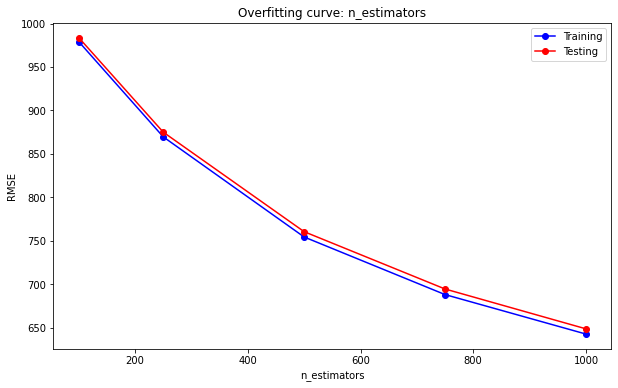

In [ ]:
%%time 
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500, 750, 1000], **best_params)

In [ ]:
best_params['n_estimators'] = 250

CPU times: user 21min 32s, sys: 1.23 s, total: 21min 33s
Wall time: 10min 58s


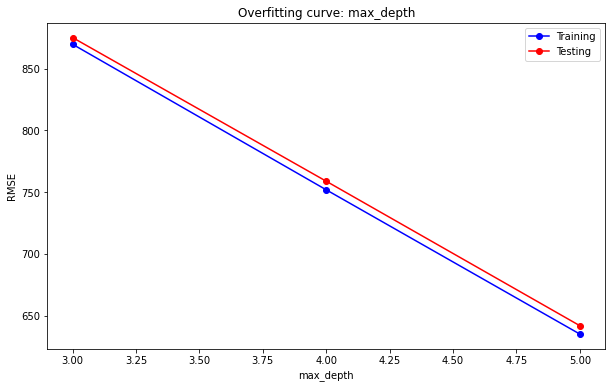

In [ ]:
%%time 
test_param_and_plot(XGBRegressor, 'max_depth', [3, 4, 5], **best_params)

In [ ]:
best_params['max_depth'] = 5

CPU times: user 16min 15s, sys: 917 ms, total: 16min 16s
Wall time: 8min 17s


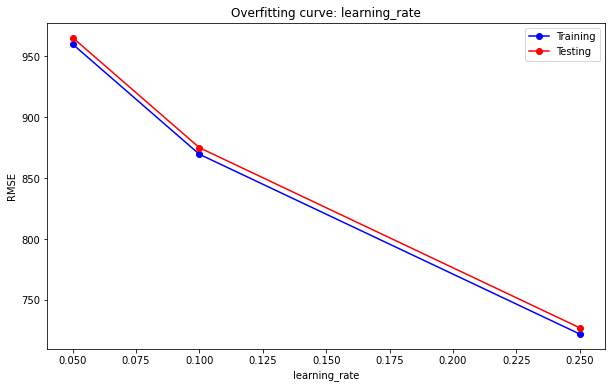

In [ ]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)

In [ ]:
best_params['learning_rate'] = 0.25

In [ ]:
xgb_tuned = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=750, max_depth=5, learning_rate=0.25, 
                               )

In [ ]:
%%time
xgb_tuned.fit(X_train,y_train)

CPU times: user 25min 39s, sys: 1.47 s, total: 25min 40s
Wall time: 13min 3s


XGBRegressor(learning_rate=0.25, max_depth=5, n_estimators=750, n_jobs=-1,
             objective='reg:squarederror', random_state=42)

In [ ]:
y_pred_train = xgb_tuned.predict(X_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train,y_pred_train))
print(rmse)

373.7556029710576


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

389.45340826821814


In [ ]:
final_pred = xgb_tuned.predict(X_test)

In [ ]:
len(final_pred)

101716